<img src="images/usm.png" width="480" height="240" align="left"/>

# MAT281 - 2° Semestre 2019
## Aplicaciones de la Matemática en la Ingeniería


EL siguiente laboratorio debe realizarse de manera individual. No es posible copiar y pegar código de otros estudiantes. 
Pueden consultar internet (stackoverflow, por ejemplo), pero deben indicar sus fuentes cuando corresponda.

**Nombre**: Joaquín Silva

**Rol**: 201604611-9


## Objetivos del laboratorio

* Reforzar conceptos básicos de regresión lineal.


## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://images-na.ssl-images-amazon.com/images/I/717VaRblQCL._UX679_.jpg" width="360" height="360" align="center"/>


El conjunto de datos se denomina `serie_poleras.csv` y consta de las ventas de poleras durante los años del 2016 al 2019. 

El objetivo es predecir el precio de la polera basados en el número de ventas que se obtiene.


Primero es necesario definir la [elasticidad](https://en.wikipedia.org/wiki/Elasticity_(economics)) (en el sentido económico). La **elasticidad demanda-precio** o simplemente **elasticidad de la demanda**, mide la variación relativa o porcentual que experimenta la cantidad demandada como consecuencia de una variación en el precio de un uno por ciento, en otras palabras mide la intensidad con la que responden los compradores a una variación en el precio.


- Cuando la reducción del precio (P) hace que la cantidad demandada (Q) aumente tanto que la multiplicación de (P * Q) sea mayor a la original, se presenta una demanda elástica.E>1
- Cuando la reducción del precio (P) hace que la cantidad demandada (Q) aumente en proporciones iguales y (P * Q) sea igual, la elasticidad es proporcional o igual a 1.
- Cuando la reducción del precio (P) hace que la cantidad demandada (Q) aumente muy poco o nada que la multiplicación de (P * Q) es menor a la original, se afirma que la demanda de un bien es inelástica o rígida. E<1

Este concepto será clave para realizar una correcta predición en los resultados. Ahora, a modo de ayuda, analicemos los datos.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, model_selection

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","serie_poleras.csv"), sep=",")

df = df[['FECHA_LUNES',
        'VENTA',
        'PRECIO',
         'STOCK',
         'NAVIDAD',
         'VERANO',
        'PRIMAVERA']]

df['FECHA_LUNES'] = pd.to_datetime(df['FECHA_LUNES'])
df.head()

,FECHA_LUNES,VENTA,PRECIO,STOCK,NAVIDAD,VERANO,PRIMAVERA
0,2016-11-28,4031,482.629433,218477.00,0,1,1
1,2016-12-05,8236,496.487690,209313.00,0,1,1
2,2016-12-12,11798,490.107492,225950.00,0,1,1
3,2016-12-19,15749,527.144433,155811.00,1,1,1
4,2016-12-26,5838,476.613886,139957.99,0,1,1


In [3]:
df["FECHA_LUNES"].max()

Timestamp('2019-08-26 00:00:00')

Le presentamos dos graficos de interés.

### a) Precio vs ventas

Dado que se quiere predecir el precio basado en las ventas de poleras, es necesario analizar la relación que existe entre ambos mediante un gráfico.

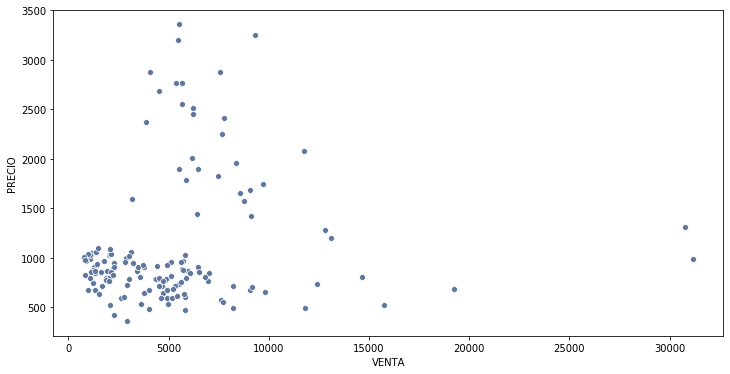

In [9]:
# parametros esteticos de seaborn
plt.figure(figsize=(12,6))
sns.scatterplot(x='VENTA',
           y='PRECIO',
           data=df)
plt.show()

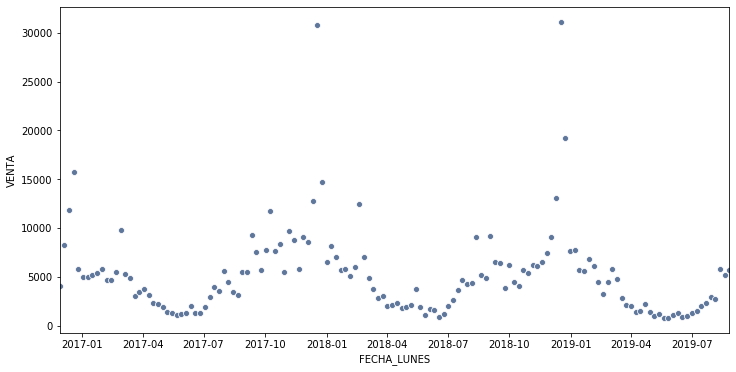

In [10]:
# parametros esteticos de seaborn
plt.figure(figsize=(12,6))
ax = sns.scatterplot(x='FECHA_LUNES',
           y='VENTA',
           data=df)

ax.set_xlim(df['FECHA_LUNES'].min(), df['FECHA_LUNES'].max())
plt.show()

Basado en la información presentada responda las siguientes preguntas:

1. ¿ Cómo debería ser la relación entre las poleras (elásticidad)?, ¿ Cómo es en realidad la elasticidad ?.
2.  ¿ Cuáles son las variables claves en el problema ?, ¿ Se necesitan más variables ?.
3. ¿ Es necesario separar por fechas ?, en caso afirmativo, separe el conjunto de datos según su criterio.
4. Realice un análisis exploratorio de los datos sobre las variables escogida en el punto 2. Ocupe estos resultados para interpretar de mejor forma el problema.
5. Realice un ajuste de regresión lineal simple. Si es necesario, puede ocupar más de una regresión lineal simple según los casos encontrados. 
6. Realice predicciones de los precios para la venta de 10000,20000 y 30000 poleras.

### Pregunta 1

La elasticidad debería ser negativa ya que las poleras es un bien normal, es decir, si se aumenta el precio la demanda debería bajar.

### Pregunta 2

Las variables claves son el precio, la venta, y la semana (el tiempo) que se esta considerando.

### Pregunta 3

Hacer un análisis de los datos para cada periodo de tiempo.

### Pregunta 4

In [11]:
# Se normalizan las columnas
df.columns = df.columns.str.lower().str.strip()
df.head()

,fecha_lunes,venta,precio,stock,navidad,verano,primavera
0,2016-11-28,4031,482.629433,218477.00,0,1,1
1,2016-12-05,8236,496.487690,209313.00,0,1,1
2,2016-12-12,11798,490.107492,225950.00,0,1,1
3,2016-12-19,15749,527.144433,155811.00,1,1,1
4,2016-12-26,5838,476.613886,139957.99,0,1,1


Notemos que las columnas verano y primavera no tienen sentido

In [12]:
# Resumen de la informacion

def resumen_por_columna(df,cols):
    pd_series = df[cols]
    
    # elementos distintos 
    l_unique = pd_series.unique()
    
    # elementos vacios
    
    l_vacios = pd_series[pd_series.isna()]
    
    df_info = pd.DataFrame({
        'columna': [cols],
        'unicos': [len(l_unique)],
        'vacios': [len(l_vacios)]
    })
    
    return df_info

frames = []

for col in df.columns:
    aux_df = resumen_por_columna(df,col)
    frames.append(aux_df)
    
df_info = pd.concat(frames).reset_index(drop=True)
df_info

,columna,unicos,vacios
0,fecha_lunes,144,0
1,venta,141,0
2,precio,144,0
3,stock,144,0
4,navidad,3,0
5,verano,2,0
6,primavera,2,0


Se observa que no hay problemas con los datos entregados

In [13]:
# Tipos de datos
tipo = df.dtypes
df.dtypes

fecha_lunes    datetime64[ns]
venta                   int64
precio                float64
stock                 float64
navidad                 int64
verano                  int64
primavera               int64
dtype: object

Vemos que no hay inconsistencias en los tipos de datos

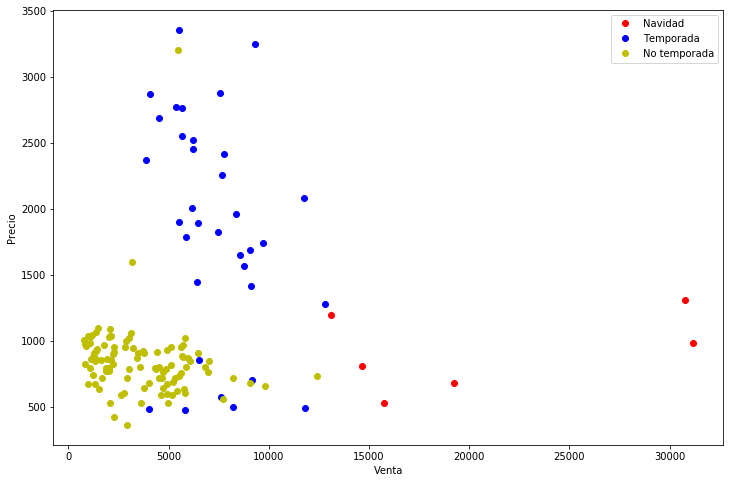

In [14]:
# Analicemos que pasa en cada periodo por separado

df_navidad = df.drop( df[df['navidad'] == 0].index )

df_temporada = df.drop( df[df['navidad'] == 1].index )
df_temporada = df_temporada.drop( df_temporada[df_temporada['navidad'] == 2].index )
df_temporada = df_temporada.drop( df_temporada[df_temporada['primavera'] == 0].index )
df_temporada = df_temporada.drop( df_temporada[df_temporada['verano'] == 0].index )

df_noTemporada = df.drop( df[df['navidad'] == 1].index )
df_noTemporada = df_noTemporada.drop( df_noTemporada[df_noTemporada['navidad'] == 2].index )
df_noTemporada = df_noTemporada.drop( df_noTemporada[df_noTemporada['primavera'] == 1].index )
df_noTemporada = df_noTemporada.drop( df_noTemporada[df_noTemporada['verano'] == 1].index )

plt.figure(figsize = (12,8))
plt.plot(df_navidad['venta'], df_navidad['precio'],'o',color='r')
plt.plot(df_temporada['venta'], df_temporada['precio'],'o',color='b')
plt.plot(df_noTemporada['venta'], df_noTemporada['precio'],'o',color='y')
plt.ylabel('Precio')
plt.xlabel('Venta')
plt.legend(['Navidad','Temporada','No temporada'],loc='best')
plt.show()

Es necesario dividir el trabajo, ya que se observan distintos comportamientos para los distintos periodos de tiempo. Obviaremos el comportamiento en navidad.

### No temporada

Consideraremos a los dos puntos con ventas mayores a 1500 como outliers.

In [15]:
df_noTemporada = df_noTemporada.drop( df_noTemporada[df_noTemporada['precio'] > 1500].index )

X1 = df_noTemporada[['venta']]
Y1 = df_noTemporada['precio']

# split dataset
X1_train, X1_test, Y1_train, Y1_test = model_selection.train_test_split(X1, Y1, test_size=0.2, random_state = 2) 

model1 = linear_model.LinearRegression()
model1_train = model1.fit(X1_train, Y1_train)
Y1_predict = model1.predict(X1_test)
print('modelo con intercepto')
print('coeficientes: ',model1_train.coef_)
print('intercepto: ',model1_train.intercept_)

modelo con intercepto
coeficientes:  [-0.02025593]
intercepto:  890.1323122256625


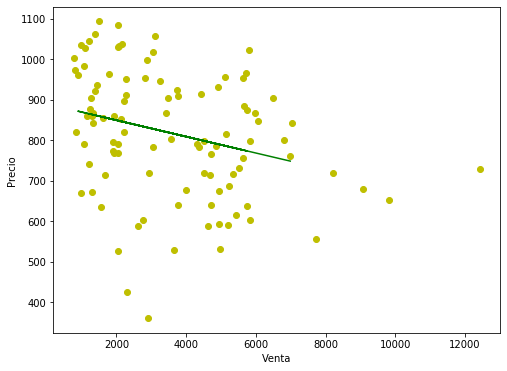

In [16]:
# Gráfico
plt.figure(figsize = (8,6))
plt.plot(df_noTemporada['venta'], df_noTemporada['precio'],'o',color='y')
plt.plot(X1_test, Y1_predict,'-',color='g')
plt.ylabel('Precio')
plt.xlabel('Venta')
plt.show()

### Temporada

In [17]:
X2 = df_temporada[['venta']]
Y2 = df_temporada['precio']

# split dataset
X2_train, X2_test, Y2_train, Y2_test = model_selection.train_test_split(X2, Y2, test_size=0.2, random_state = 2) 

model2 = linear_model.LinearRegression()
model2_train = model2.fit(X2_train, Y2_train)
Y2_predict = model2.predict(X2_test)
print('modelo con intercepto')
print('coeficientes: ',model2_train.coef_)
print('intercepto: ',model2_train.intercept_)

modelo con intercepto
coeficientes:  [-0.16920641]
intercepto:  3093.5933088868546


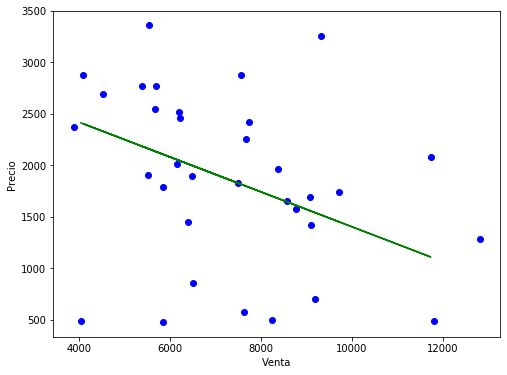

In [18]:
# Gráfico
plt.figure(figsize = (8,6))
plt.plot(df_temporada['venta'], df_temporada['precio'],'o',color='b')
plt.plot(X2_test, Y2_predict, '-', color='g')
plt.ylabel('Precio')
plt.xlabel('Venta')
plt.show()

### Pregunta 6

In [19]:
# Temporada

print("Valores predichos para 10000, 20000 y 30000 poleras respectivamente: ", model2.predict(pd.DataFrame({'VENTA':[10000,20000,30000]})) )

Valores predichos para 10000, 20000 y 30000 poleras respectivamente:  [ 1401.52916529  -290.5349783  -1982.5991219 ]


In [20]:
# No Temporada

print("Valores predichos para 10000, 20000 y 30000 poleras respectivamente: ", model1.predict(pd.DataFrame({'VENTA':[10000,20000,30000]})) )

Valores predichos para 10000, 20000 y 30000 poleras respectivamente:  [687.57305427 485.01379631 282.45453836]


### Referencias

* [A beginner’s guide to Linear Regression in Python with Scikit-Learn](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f)